In [1]:
import pandas as pd
import numpy as np
import os
import folium
from folium import IFrame
import json
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [15]:
df = pd.read_csv(os.path.join('data', 'operacoes-financiamento-operacoes-indiretas-automaticas.csv'), sep = ';', decimal=',')

In [18]:
inovacao = df[['uf', 'inovacao', 'situacao_da_operacao']]
inovacao.head()

,uf,inovacao,situacao_da_operacao
0,SP,NÃO,LIQUIDADA
1,RS,NÃO,LIQUIDADA
2,RS,NÃO,LIQUIDADA
3,RS,NÃO,LIQUIDADA
4,RS,NÃO,LIQUIDADA


In [19]:
inovacao.tail()

,uf,inovacao,situacao_da_operacao
2083358,SC,NÃO,ATIVA
2083359,PR,NÃO,ATIVA
2083360,RS,NÃO,ATIVA
2083361,SP,NÃO,ATIVA
2083362,PR,NÃO,ATIVA


1) Número de Inovações Totais

In [64]:
inov = inovacao['inovacao']

'''
Aumento razão plantio/colheito por anos
Expansão área plantada
Evolução percentual do valor do plantio
'''

s_n, contador = np.unique(inov, return_counts=True)
print('Número de financiamentos que envolveram ideias inovadoras (SIM) e não inovadoras (NÃO)')
for i in range(len(s_n)): print(s_n[i], ' ', contador[i])

Número de financiamentos que envolveram ideias inovadoras (SIM) e não inovadoras (NÃO)
NÃO   2082863
SIM   500


2) Distribuição das Inovações por Estado

In [65]:
distribuicao_inovacao_estado = inovacao[['uf', 'inovacao']].sort_values(by = ['uf'])

conjuntos, contador = np.unique(np.array(distribuicao_inovacao_estado).astype('<U22'), return_counts= True, axis = 0)
print('Distribuição de Inovação por estado')
for i in range(len(conjuntos)):
    print(conjuntos[i][0], '   ', conjuntos[i][1], '   ', contador[i])

Distribuição de Inovação por estado
 AC     NÃO     4520
 AL     NÃO     9888
 AM     NÃO     13602
 AP     NÃO     2366
 BA     NÃO     72896
 BA     SIM     2
 CE     NÃO     33253
 CE     SIM     1
 DF     NÃO     14455
 ES     NÃO     62606
 ES     SIM     10
 GO     NÃO     73027
 GO     SIM     5
 MA     NÃO     22227
 MA     SIM     3
 MG     NÃO     232359
 MG     SIM     77
 MS     NÃO     32306
 MS     SIM     5
 MT     NÃO     53887
 MT     SIM     7
 PA     NÃO     29550
 PB     NÃO     13204
 PB     SIM     2
 PE     NÃO     49771
 PE     SIM     1
 PI     NÃO     9797
 PR     NÃO     275139
 PR     SIM     80
 RJ     NÃO     79354
 RJ     SIM     11
 RN     NÃO     12941
 RO     NÃO     19500
 RR     NÃO     2053
 RS     NÃO     288407
 RS     SIM     81
 SC     NÃO     216047
 SC     SIM     92
 SE     NÃO     8564
 SP     NÃO     434612
 SP     SIM     122
 TO     NÃO     16532
 TO     SIM     1


3) Estados que Apresentaram Ideias Inovadoras e o Número de Ideias Inovadoras por Estado

In [80]:
print('Estados que apresentaram ideias inovadoras')
qtd_estados_inov = 0
for i in range(len(conjuntos)):
    if conjuntos[i][1] == 'SIM':
        print(conjuntos[i][0], '   ', contador[i])
        qtd_estados_inov += 1

qtd_ideias_inov = inovacao['inovacao'].value_counts()

print(f"\nPorcentagem de estados que apresentaram ideias inovadoras: {np.around(qtd_estados_inov / len(np.unique(df['uf'], return_counts = True)[1]) * 100, decimals = 2)} %")
print(f'Porcentagem de ideias inovadoras em relação ao total: {np.around(qtd_ideias_inov[1] / sum(qtd_ideias_inov) * 100, decimals = 3)} %')

Estados que apresentaram ideias inovadoras
 BA     2
 CE     1
 ES     10
 GO     5
 MA     3
 MG     77
 MS     5
 MT     7
 PB     2
 PE     1
 PR     80
 RJ     11
 RS     81
 SC     92
 SP     122
 TO     1

Porcentagem de estados que apresentaram ideias inovadoras: 59.26 %
Porcentagem de ideias inovadoras em relação ao total: 0.024 %


4) Estados com maior número de ideias inovadoras já tiveram a situação da operação como liquidada?

In [81]:
estado_situacao = inovacao[['uf', 'situacao_da_operacao']].sort_values(by = ['uf'])

df_estado_situacao = pd.DataFrame(columns = ['uf', 'situacao', 'contagem'])

conjuntos, contador = np.unique(np.array(estado_situacao).astype('<U22'), return_counts= True, axis = 0)
print('Distribuição da Situação da Operação por estado')
for i in range(len(conjuntos)):
    df_estado_situacao.loc[i] = [conjuntos[i][0]] + [conjuntos[i][1]] + [contador[i]]
    print(conjuntos[i][0], '   ', conjuntos[i][1], '   ', contador[i])

Distribuição da Situação da Operação por estado
 AC     ATIVA     560
 AC     LIQUIDADA     3960
 AL     ATIVA     714
 AL     LIQUIDADA     9174
 AM     ATIVA     1160
 AM     LIQUIDADA     12442
 AP     ATIVA     217
 AP     LIQUIDADA     2149
 BA     ATIVA     7355
 BA     LIQUIDADA     65543
 CE     ATIVA     2536
 CE     LIQUIDADA     30718
 DF     ATIVA     1217
 DF     LIQUIDADA     13238
 ES     ATIVA     4920
 ES     LIQUIDADA     57696
 GO     ATIVA     8783
 GO     LIQUIDADA     64249
 MA     ATIVA     1964
 MA     LIQUIDADA     20266
 MG     ATIVA     28598
 MG     LIQUIDADA     203838
 MS     ATIVA     4487
 MS     LIQUIDADA     27824
 MT     ATIVA     8881
 MT     LIQUIDADA     45013
 PA     ATIVA     2955
 PA     LIQUIDADA     26595
 PB     ATIVA     1249
 PB     LIQUIDADA     11957
 PE     ATIVA     4562
 PE     LIQUIDADA     45210
 PI     ATIVA     1069
 PI     LIQUIDADA     8728
 PR     ATIVA     38999
 PR     LIQUIDADA     236220
 RJ     ATIVA     8334
 RJ     LIQUID

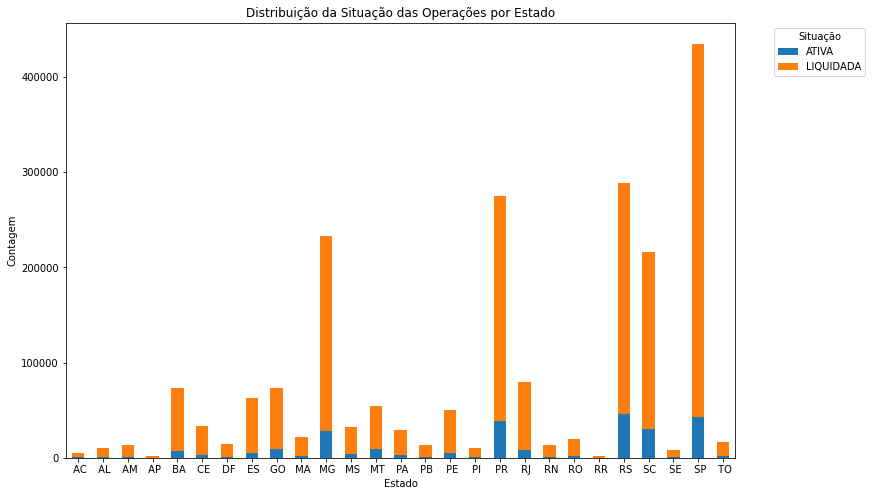

In [94]:
dfp = df_estado_situacao.pivot(index = 'uf', columns = 'situacao', values = 'contagem')
dfp.plot.bar(stacked = True, figsize = (12,8), xlabel = 'Estado', ylabel = 'Contagem', title = 'Distribuição da Situação das Operações por Estado')
plt.legend(title = 'Situação', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 0)
plt.show()

5) Exemplos da Distribuição das Operações em alguns Estados

São Paulo

  inovacao   situacao contagem
0      NÃO      ATIVA    43104
1      NÃO  LIQUIDADA   391508
2      SIM      ATIVA       59
3      SIM  LIQUIDADA       63


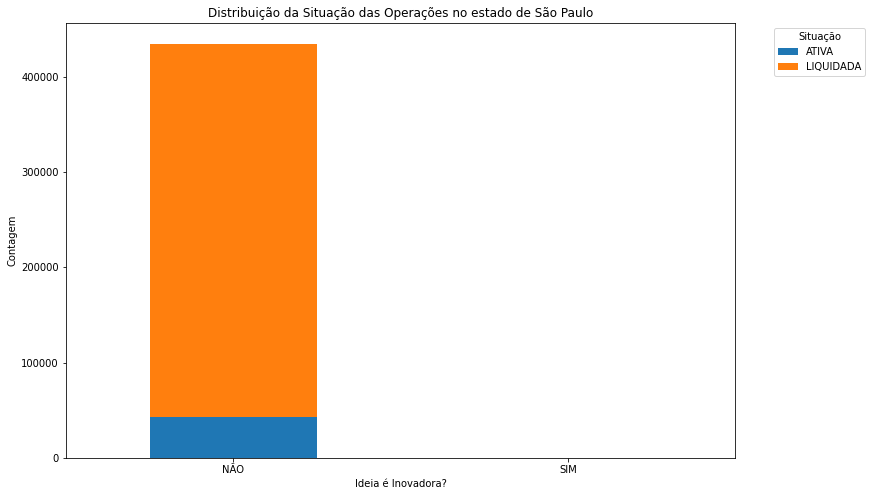

In [127]:
inov_sp = inovacao.loc[inovacao['uf'] == ' SP']
df_sp = pd.DataFrame(columns = ['inovacao','situacao', 'contagem'])

conjuntos, contador = np.unique(np.array(inov_sp[['inovacao', 'situacao_da_operacao']]).astype('<U22'), return_counts= True, axis = 0)
for i in range(len(conjuntos)):
    df_sp.loc[i] = [conjuntos[i][0]] + [conjuntos[i][1]] + [contador[i]]

print(df_sp)

dfp = df_sp.pivot(index = 'inovacao', columns = 'situacao', values = 'contagem')
dfp.plot.bar(stacked = True, figsize = (12,8), xlabel = 'Ideia é Inovadora?', ylabel = 'Contagem', title = 'Distribuição da Situação das Operações no estado de São Paulo')
plt.legend(title = 'Situação', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 0)
plt.show()


Minas Gerais

  inovacao   situacao contagem
0      NÃO      ATIVA    28545
1      NÃO  LIQUIDADA   203814
2      SIM      ATIVA       53
3      SIM  LIQUIDADA       24


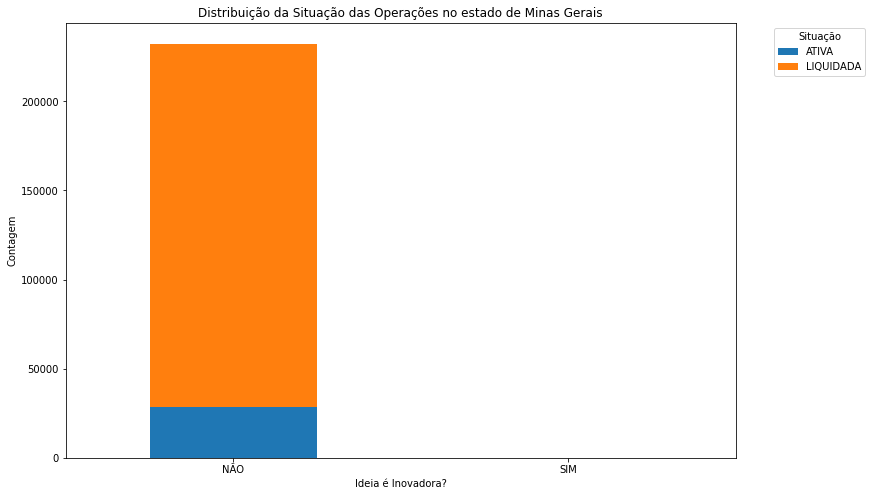

In [128]:
inov_mg = inovacao.loc[inovacao['uf'] == ' MG']
df_mg = pd.DataFrame(columns = ['inovacao','situacao', 'contagem'])

conjuntos, contador = np.unique(np.array(inov_mg[['inovacao', 'situacao_da_operacao']]).astype('<U22'), return_counts= True, axis = 0)
for i in range(len(conjuntos)):
    df_mg.loc[i] = [conjuntos[i][0]] + [conjuntos[i][1]] + [contador[i]]

print(df_mg)

dfp = df_mg.pivot(index = 'inovacao', columns = 'situacao', values = 'contagem')
dfp.plot.bar(stacked = True, figsize = (12,8), xlabel = 'Ideia é Inovadora?', ylabel = 'Contagem', title = 'Distribuição da Situação das Operações no estado de Minas Gerais')
plt.legend(title = 'Situação', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 0)
plt.show()

Rio de Janeiro

  inovacao   situacao contagem
0      NÃO      ATIVA     8334
1      NÃO  LIQUIDADA    71020
2      SIM  LIQUIDADA       11


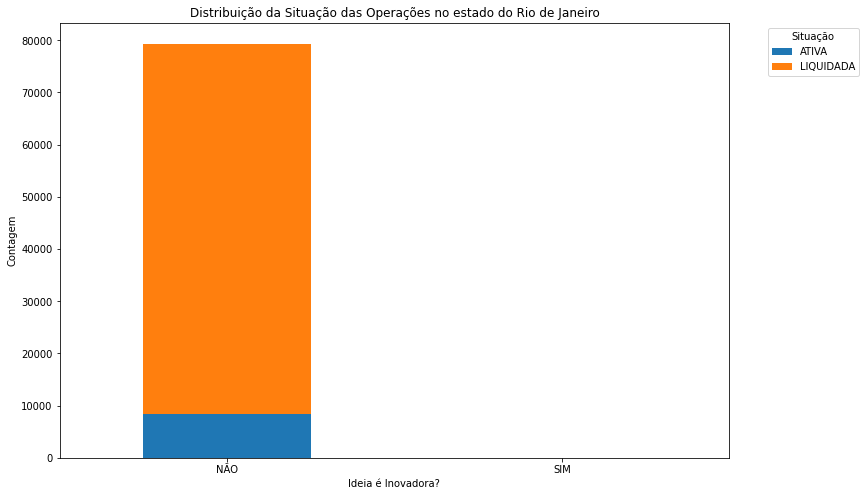

In [129]:
inov_rj = inovacao.loc[inovacao['uf'] == ' RJ']
df_rj = pd.DataFrame(columns = ['inovacao','situacao', 'contagem'])

conjuntos, contador = np.unique(np.array(inov_rj[['inovacao', 'situacao_da_operacao']]).astype('<U22'), return_counts= True, axis = 0)
for i in range(len(conjuntos)):
    df_rj.loc[i] = [conjuntos[i][0]] + [conjuntos[i][1]] + [contador[i]]

print(df_rj)

dfp = df_rj.pivot(index = 'inovacao', columns = 'situacao', values = 'contagem')
dfp.plot.bar(stacked = True, figsize = (12,8), xlabel = 'Ideia é Inovadora?', ylabel = 'Contagem', title = 'Distribuição da Situação das Operações no estado do Rio de Janeiro')
plt.legend(title = 'Situação', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 0)
plt.show()

Espírito Santo

  inovacao   situacao contagem
0      NÃO      ATIVA     4913
1      NÃO  LIQUIDADA    57693
2      SIM      ATIVA        7
3      SIM  LIQUIDADA        3


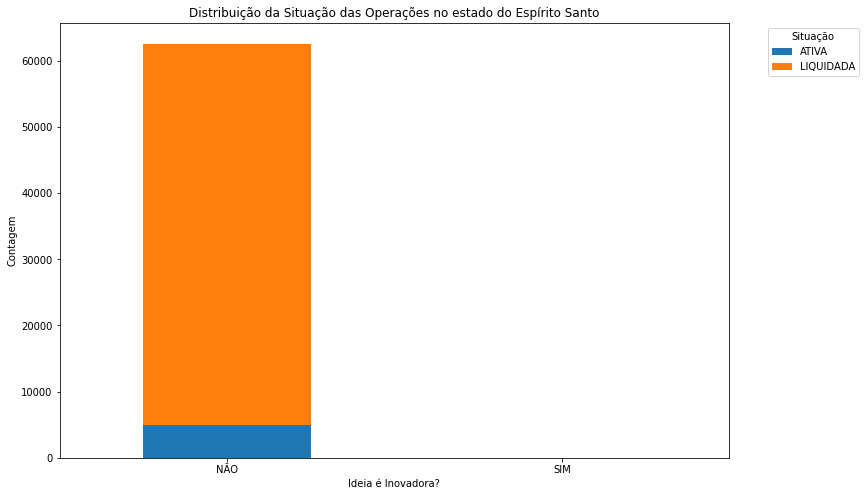

In [131]:
inov_es = inovacao.loc[inovacao['uf'] == ' ES']
df_es = pd.DataFrame(columns = ['inovacao','situacao', 'contagem'])

conjuntos, contador = np.unique(np.array(inov_es[['inovacao', 'situacao_da_operacao']]).astype('<U22'), return_counts= True, axis = 0)
for i in range(len(conjuntos)):
    df_es.loc[i] = [conjuntos[i][0]] + [conjuntos[i][1]] + [contador[i]]

print(df_es)

dfp = df_es.pivot(index = 'inovacao', columns = 'situacao', values = 'contagem')
dfp.plot.bar(stacked = True, figsize = (12,8), xlabel = 'Ideia é Inovadora?', ylabel = 'Contagem', title = 'Distribuição da Situação das Operações no estado do Espírito Santo')
plt.legend(title = 'Situação', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 0)
plt.show()

Acre

  inovacao   situacao contagem
0      NÃO      ATIVA      560
1      NÃO  LIQUIDADA     3960


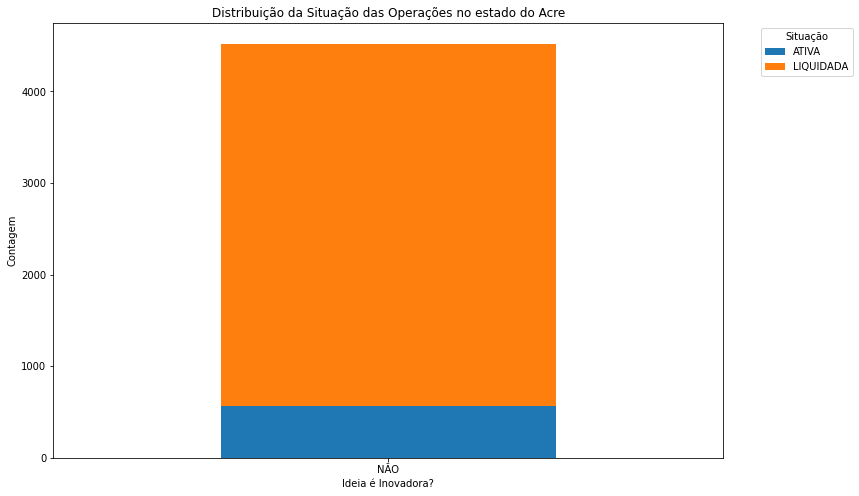

In [132]:
inov_ac = inovacao.loc[inovacao['uf'] == ' AC']
df_ac = pd.DataFrame(columns = ['inovacao','situacao', 'contagem'])

conjuntos, contador = np.unique(np.array(inov_ac[['inovacao', 'situacao_da_operacao']]).astype('<U22'), return_counts= True, axis = 0)
for i in range(len(conjuntos)):
    df_ac.loc[i] = [conjuntos[i][0]] + [conjuntos[i][1]] + [contador[i]]

print(df_ac)

dfp = df_ac.pivot(index = 'inovacao', columns = 'situacao', values = 'contagem')
dfp.plot.bar(stacked = True, figsize = (12,8), xlabel = 'Ideia é Inovadora?', ylabel = 'Contagem', title = 'Distribuição da Situação das Operações no estado do Acre')
plt.legend(title = 'Situação', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 0)
plt.show()

Amazonas

  inovacao   situacao contagem
0      NÃO      ATIVA     1160
1      NÃO  LIQUIDADA    12442


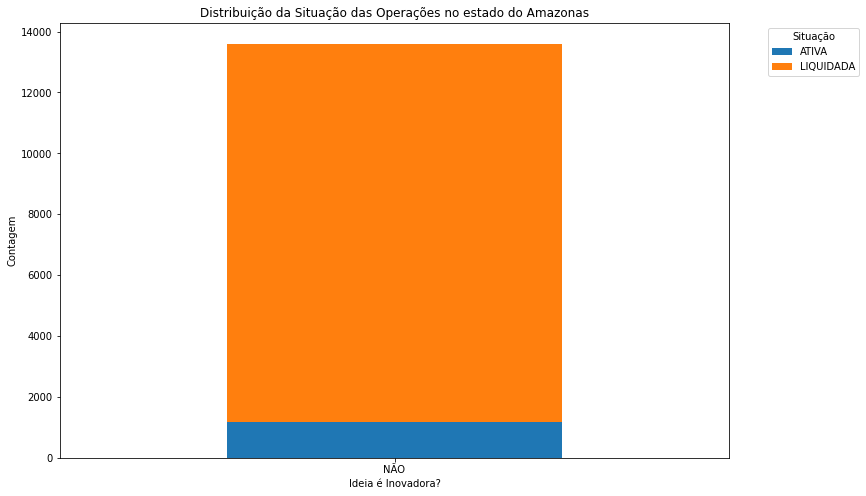

In [134]:
inov_am = inovacao.loc[inovacao['uf'] == ' AM']
df_am = pd.DataFrame(columns = ['inovacao','situacao', 'contagem'])

conjuntos, contador = np.unique(np.array(inov_am[['inovacao', 'situacao_da_operacao']]).astype('<U22'), return_counts= True, axis = 0)
for i in range(len(conjuntos)):
    df_am.loc[i] = [conjuntos[i][0]] + [conjuntos[i][1]] + [contador[i]]

print(df_am)

dfp = df_am.pivot(index = 'inovacao', columns = 'situacao', values = 'contagem')
dfp.plot.bar(stacked = True, figsize = (12,8), xlabel = 'Ideia é Inovadora?', ylabel = 'Contagem', title = 'Distribuição da Situação das Operações no estado do Amazonas')
plt.legend(title = 'Situação', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 0)
plt.show()

Paraná

  inovacao   situacao contagem
0      NÃO      ATIVA    38953
1      NÃO  LIQUIDADA   236186
2      SIM      ATIVA       46
3      SIM  LIQUIDADA       34


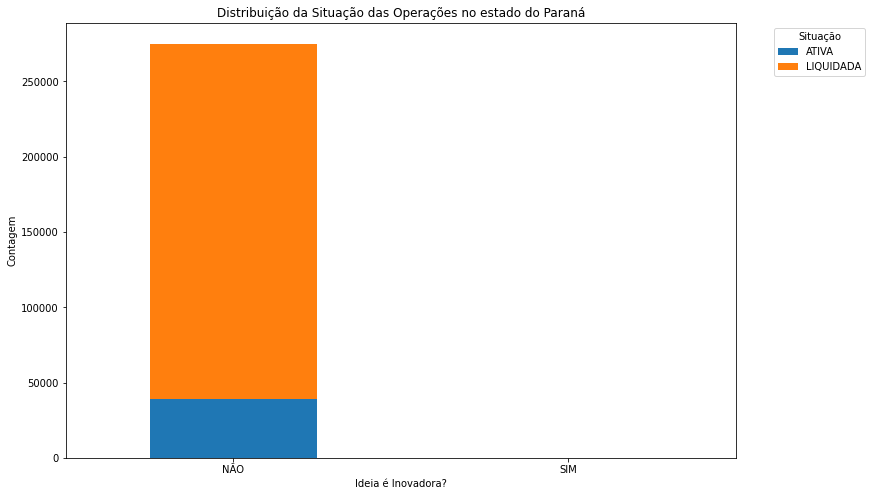

In [135]:
inov_pr = inovacao.loc[inovacao['uf'] == ' PR']
df_pr = pd.DataFrame(columns = ['inovacao','situacao', 'contagem'])

conjuntos, contador = np.unique(np.array(inov_pr[['inovacao', 'situacao_da_operacao']]).astype('<U22'), return_counts= True, axis = 0)
for i in range(len(conjuntos)):
    df_pr.loc[i] = [conjuntos[i][0]] + [conjuntos[i][1]] + [contador[i]]

print(df_pr)

dfp = df_pr.pivot(index = 'inovacao', columns = 'situacao', values = 'contagem')
dfp.plot.bar(stacked = True, figsize = (12,8), xlabel = 'Ideia é Inovadora?', ylabel = 'Contagem', title = 'Distribuição da Situação das Operações no estado do Paraná')
plt.legend(title = 'Situação', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 0)
plt.show()

6) Proporção de operações ativas e liquidadas de acordo com a inovação

In [52]:
inovacao_sim = inovacao.loc[inovacao['inovacao'] == 'SIM']

conjuntos, contador = np.unique(np.array(inovacao_sim[['inovacao', 'situacao_da_operacao']]).astype('<U22'), return_counts= True, axis = 0)
print('Número de financiamentos que envolveram ideias inovadoras, separando em ATIVA e LIQUIDADA')
for i in range(len(conjuntos)):
    print(conjuntos[i][1], '   ', contador[i])

print(f'Para ideias inovadoras, a porcentagem de operações liquidadas em relação ao total é: {np.around(contador[1] / (contador[0] + contador[1]) * 100, decimals = 2)} %')

inovacao_nao = inovacao.loc[inovacao['inovacao'] == 'NÃO']

conjuntos, contador = np.unique(np.array(inovacao_nao[['inovacao', 'situacao_da_operacao']]).astype('<U22'), return_counts= True, axis = 0)
print('\nNúmero de financiamentos que envolveram ideias não inovadoras, separando em ATIVA e LIQUIDADA')
for i in range(len(conjuntos)):
    print(conjuntos[i][1], '   ', contador[i])

print(f'Para ideias não inovadoras, a porcentagem de operações liquidadas em relação ao total é: {np.around(contador[1] / (contador[0] + contador[1]) * 100, decimals = 2)} %')

Número de financiamentos que envolveram ideias inovadoras, separando em ATIVA e LIQUIDADA
ATIVA     287
LIQUIDADA     213
Para ideias inovadoras, a porcentagem de operações liquidadas em relação ao total é: 42.6 %

Número de financiamentos que envolveram ideias não inovadoras, separando em ATIVA e LIQUIDADA
ATIVA     253123
LIQUIDADA     1829740
Para ideias não inovadoras, a porcentagem de operações liquidadas em relação ao total é: 87.85 %


Import dos arquivos geodata para os estados do Brasil

Fonte: https://github.com/tbrugz/geodata-br

In [11]:
# Sudeste
with open(os.path.join('data/json', 'sp.json'), encoding='utf8') as sp_json:
    SP = json.load(sp_json)
with open(os.path.join('data/json', 'mg.json'), encoding='utf8') as mg_json:
    MG = json.load(mg_json)
with open(os.path.join('data/json', 'rj.json'), encoding='utf8') as rj_json:
    RJ = json.load(rj_json)
with open(os.path.join('data/json', 'es.json'), encoding='utf8') as es_json:
    ES = json.load(es_json)

# Centro-Oeste
with open(os.path.join('data/json', 'go.json'), encoding='utf8') as go_json:
    GO = json.load(go_json)
with open(os.path.join('data/json', 'df.json'), encoding='utf8') as df_json:
    DF = json.load(df_json)
with open(os.path.join('data/json', 'mt.json'), encoding='utf8') as mt_json:
    MT = json.load(mt_json)
with open(os.path.join('data/json', 'ms.json'), encoding='utf8') as ms_json:
    MS = json.load(ms_json)

# Nordeste
with open(os.path.join('data/json', 'ba.json'), encoding='utf8') as ba_json:
    BA = json.load(ba_json)
with open(os.path.join('data/json', 'al.json'), encoding='utf8') as al_json:
    AL = json.load(al_json)
with open(os.path.join('data/json', 'ce.json'), encoding='utf8') as ce_json:
    CE = json.load(ce_json)
with open(os.path.join('data/json', 'ma.json'), encoding='utf8') as ma_json:
    MA = json.load(ma_json)
with open(os.path.join('data/json', 'pb.json'), encoding='utf8') as pb_json:
    PB = json.load(pb_json)
with open(os.path.join('data/json', 'pe.json'), encoding='utf8') as pe_json:
    PE = json.load(pe_json)
with open(os.path.join('data/json', 'pi.json'), encoding='utf8') as pi_json:
    PI = json.load(pi_json)
with open(os.path.join('data/json', 'rn.json'), encoding='utf8') as rn_json:
    RN = json.load(rn_json)
with open(os.path.join('data/json', 'se.json'), encoding='utf8') as se_json:
    SE = json.load(se_json)

#Sul
with open(os.path.join('data/json', 'rs.json'), encoding='utf8') as rs_json:
    RS = json.load(rs_json)
with open(os.path.join('data/json', 'pr.json'), encoding='utf8') as pr_json:
    PR = json.load(pr_json)
with open(os.path.join('data/json', 'sc.json'), encoding='utf8') as sc_json:
    SC = json.load(sc_json)

# Norte
with open(os.path.join('data/json', 'ac.json'), encoding='utf8') as ac_json:
    AC = json.load(ac_json)
with open(os.path.join('data/json', 'am.json'), encoding='utf8') as am_json:
    AM = json.load(am_json)
with open(os.path.join('data/json', 'ap.json'), encoding='utf8') as ap_json:
    AP = json.load(ap_json)
with open(os.path.join('data/json', 'pa.json'), encoding='utf8') as pa_json:
    PA = json.load(pa_json)
with open(os.path.join('data/json', 'ro.json'), encoding='utf8') as ro_json:
    RO = json.load(ro_json)
with open(os.path.join('data/json', 'rr.json'), encoding='utf8') as rr_json:
    RR = json.load(rr_json)
with open(os.path.join('data/json', 'to.json'), encoding='utf8') as to_json:
    TO = json.load(to_json)


In [23]:
def highlight_function(feature):
    return {'fillColor':'00008B'}

estilos = {'terrain':'Stamen Terrain', 'dark':'CartoDB dark_matter', 'positron':'CartoDB positron', 'toner':'Stamen Toner', 'water':'Stamen Watercolor'}
m = folium.Map(location = [-15.639513, -46.076170], zoom_start = 5, tiles = estilos['terrain'])

In [24]:
folium_sp = folium.GeoJson(SP, highlight_function = highlight_function, tooltip ='São Paulo', style_function = lambda x:{'fillColor':'#D2691E', 'color':'#0000FF', 'weight': 0.1})
#popup.add_to(folium_sp)
folium_sp.add_to(m)
folium.GeoJson(MG, highlight_function = highlight_function, tooltip ='Minas Gerais', style_function = lambda x:{'fillColor':'#00FD00', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(RJ, highlight_function = highlight_function, tooltip ='Rio de Janeiro', style_function = lambda x:{'fillColor':'#AD98D9', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(ES, highlight_function = highlight_function, tooltip ='Espírito Santo', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)

folium.GeoJson(RS, highlight_function = highlight_function, tooltip ='Rio Grande do Sul', style_function = lambda x:{'fillColor':'#FF1111', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(PR, highlight_function = highlight_function, tooltip ='Paraná', style_function = lambda x:{'fillColor':'#00FFFF', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(SC, highlight_function = highlight_function, tooltip ='Santa Catarina', style_function = lambda x:{'fillColor':'#AD9800', 'color':'#0000FF', 'weight': 0.1}).add_to(m)

folium.GeoJson(AC, highlight_function = highlight_function, tooltip ='Acre', style_function = lambda x:{'fillColor':'#FF8C00', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(AM, highlight_function = highlight_function, tooltip ='Amazonas', style_function = lambda x:{'fillColor':'#00FFFF', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(AP, highlight_function = highlight_function, tooltip ='Amapá', style_function = lambda x:{'fillColor':'#FA00FF', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(PA, highlight_function = highlight_function, tooltip ='Pará', style_function = lambda x:{'fillColor':'#E5FF00', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(RO, highlight_function = highlight_function, tooltip ='Rondônia', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(RR, highlight_function = highlight_function, tooltip ='Roraima', style_function = lambda x:{'fillColor':'#FF4B00', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(TO, highlight_function = highlight_function, tooltip ='Tocantins', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)

folium.GeoJson(DF, highlight_function = highlight_function, tooltip ='Distrito Federal', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(GO, highlight_function = highlight_function, tooltip ='Goiás', style_function = lambda x:{'fillColor':'#49E68C', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(MT, highlight_function = highlight_function, tooltip ='Mato Grosso', style_function = lambda x:{'fillColor':'#49E68C', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(MS, highlight_function = highlight_function, tooltip ='Mato Grosso do Sul', style_function = lambda x:{'fillColor':'#49E68C', 'color':'#0000FF', 'weight': 0.1}).add_to(m)

folium.GeoJson(AL, highlight_function = highlight_function, tooltip ='Alagoas', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(BA, highlight_function = highlight_function, tooltip ='Bahia', style_function = lambda x:{'fillColor':'#498C8C', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(CE, highlight_function = highlight_function, tooltip ='Ceará', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(MA, highlight_function = highlight_function, tooltip ='Maranhão', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(PB, highlight_function = highlight_function, tooltip ='Paraíba', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(PE, highlight_function = highlight_function, tooltip ='Pernambuco', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(PI, highlight_function = highlight_function, tooltip ='Piauí', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(RN, highlight_function = highlight_function, tooltip ='Rio Grande do Norte', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(SE, highlight_function = highlight_function, tooltip ='Sergipe', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)

In [25]:
m.save('mapa_financiamentos.html')